In [5]:
# 需求：模拟生成一家商店全年营收额，生成日期和销量两列数据，保存到csv文件
#     用pandas读取csv数据，常见DataFrame对象
#     对数据进行处理
#     生成折线图，反映商店全年营收的变化情况，把图片保存 first.png
#     按月份就行统计，用柱形图显示每月的营收情况，把图片保存second.png
#     按月份进行统计，找出营收额最高的月份，把数据保存txt文件
#     按季度进行统计，统计营收情况，饼形图显示，把图片保存为three.png

In [6]:
import csv
import codecs
import random
import datetime

In [7]:
filename = 'data/shop_data.csv'
with codecs.open(filename,'w','utf-8') as file:
    wr = csv.writer(file)
    wr.writerow(['日期','销量'])
    # 模拟生成起始日期
    start_date = datetime.date(2019,1,1)
    # 模拟生成365个销量的数据
    for i in range(365):
        if random.random()>0.5:
            amount = 400 +random.randrange(20)
        else:
            amount = 400 -random.randrange(20)
        wr.writerow([str(start_date),amount])
        # 生成下一个日期
        start_date = start_date + datetime.timedelta(days=1)

# 读取数据

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df_obj = pd.read_csv('data/shop_data.csv')
print(df_obj)

             日期   销量
0    2019-01-01  381
1    2019-01-02  405
2    2019-01-03  419
3    2019-01-04  412
4    2019-01-05  390
..          ...  ...
360  2019-12-27  400
361  2019-12-28  407
362  2019-12-29  408
363  2019-12-30  382
364  2019-12-31  411

[365 rows x 2 columns]


In [10]:
date_ls =  list(df_obj['日期'])
print(date_ls)
def func(n):
    return date_ls.index(n)%36 == 0
f = filter(func,date_ls)
date_ls= list(f)
print(date_ls)

['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019

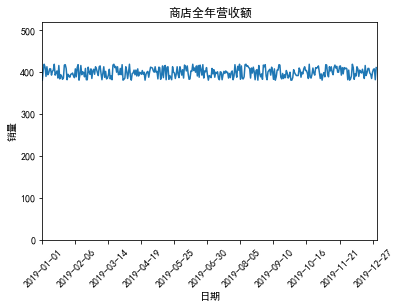

In [37]:
fig,ax = plt.subplots(1)
ax.set_title('商店全年营收额')
ax.set_xlabel('日期')
ax.set_ylabel('销量')


ax.plot(df_obj['销量'])
# 设置刻度显示的范围
ax.set_xlim([0,df_obj.shape[0]])
ax.set_xticks(range(0,df_obj.shape[0],36))
ax.set_ylim([0,df_obj['销量'].max()+100])

# 取消一些天，不全显示
# ax.set_xticklabels(df_obj['日期'],rotation=45)
ax.set_xticklabels(date_ls,rotation=45)


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.savefig('first.jpg')
plt.show()

##    按月份就行统计，用柱形图显示每月的营收情况，把图片保存second.png

In [12]:
df_obj1 =df_obj[:]
# print(df_obj1)
df_obj1['month'] = df_obj1['日期'].map(lambda x:x[0:x.rindex('-')])
print(df_obj1)




             日期   销量    month
0    2019-01-01  381  2019-01
1    2019-01-02  405  2019-01
2    2019-01-03  419  2019-01
3    2019-01-04  412  2019-01
4    2019-01-05  390  2019-01
..          ...  ...      ...
360  2019-12-27  400  2019-12
361  2019-12-28  407  2019-12
362  2019-12-29  408  2019-12
363  2019-12-30  382  2019-12
364  2019-12-31  411  2019-12

[365 rows x 3 columns]


f:\linux\python\myvenv\env1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_obj1 = df_obj1.groupby('month').sum()
print(df_obj1)

            销量
month         
2019-01  12382
2019-02  11158
2019-03  12381
2019-04  11948
2019-05  12393
2019-06  12078
2019-07  12257
2019-08  12458
2019-09  11891
2019-10  12394
2019-11  12101
2019-12  12376


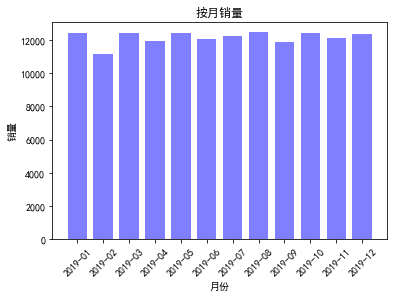

In [20]:

x = np.array(range(12))
width = 0.75
fig,ax =  plt.subplots(1)
plt.bar(x,df_obj1['销量'],width,color='b',alpha=0.5)
ax.set_title('按月销量')
ax.set_xlabel('月份')
ax.set_ylabel('销量')
ax.set_xticks(x)
ax.set_xticklabels(df_obj1.index,rotation=45)
plt.savefig('second.jpg')
plt.show()

#     按月份进行统计，找出营收额最高的月份，把数据保存txt文件


In [27]:
max_amount = df_obj1['销量'].max()
print(max_amount)
df_obj2 = df_obj1[df_obj1['销量']==max_amount]
print(df_obj2)
print(type(df_obj2))
with open('data/max_month.txt','w',encoding='utf-8') as file:
    file.write(str(df_obj2.iloc[:,:]))

12458
            销量
month         
2019-08  12458
<class 'pandas.core.frame.DataFrame'>


#     按季度进行统计，统计营收情况，饼形图显示，把图片保存为three.png

In [29]:
print(df_obj1)
# df_obj1['季度'] = ['']


q1 = df_obj1.iloc[:3,0].sum()
q2 = df_obj1.iloc[3:6,0].sum()
q3 = df_obj1.iloc[6:9,0].sum()
q4 = df_obj1.iloc[9:12,0].sum()
sizes = [q1,q2,q3,q4] 
print(sizes)

            销量
month         
2019-01  12382
2019-02  11158
2019-03  12381
2019-04  11948
2019-05  12393
2019-06  12078
2019-07  12257
2019-08  12458
2019-09  11891
2019-10  12394
2019-11  12101
2019-12  12376
[35921, 36419, 36606, 36871]


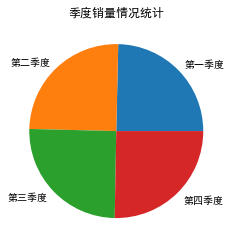

In [32]:
fig,ax = plt.subplots(1)
ax.set_title('季度销量情况统计')
ax.pie(sizes,labels=['第一季度','第二季度','第三季度','第四季度'])
plt.show()

In [30]:
print(df_obj1)
df_obj1['季度'] = ['4','1','1','1','2','2','2','3','3','3','4','4']
print(df_obj1)


            销量
month         
2019-01  12382
2019-02  11158
2019-03  12381
2019-04  11948
2019-05  12393
2019-06  12078
2019-07  12257
2019-08  12458
2019-09  11891
2019-10  12394
2019-11  12101
2019-12  12376
            销量 季度
month            
2019-01  12382  4
2019-02  11158  1
2019-03  12381  1
2019-04  11948  1
2019-05  12393  2
2019-06  12078  2
2019-07  12257  2
2019-08  12458  3
2019-09  11891  3
2019-10  12394  3
2019-11  12101  4
2019-12  12376  4
